# Import libraries

In [26]:
# scientific packages
import numpy as py
import sklearn as sk
import pandas as pd

# utils
from dotenv import load_dotenv

# Data Collection and Processing
## Collection
In order to actually run the PCA, I need to get a bunch of data to analyze from Spotify. I already have a Spotify application set up with a `client id` and `client secret`. Using the **`spotipy`** package, we can randomly search for songs and put them into a csv for which we can then run a PCA. This was done beforehand and you can see the code for this in `collect_data.py` We can directly load the data into a `pandas` DataFrame.

In [27]:
# load data into csv
df_raw = pd.read_csv('data.csv')

# examine
df_raw.head()

,Unnamed: 0,name,id,artist,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,Wonderwall - Remastered,7ygpwy2qP3NbrxVkHvUhXY,Oasis,beatlesque,0.000509,0.375,0.893,0.000000,0.187,-4.097,0.0406,174.323,0.434
1,1,Hypnotize - 2014 Remaster,7KwZNVEaqikRSBSpyhXK2j,The Notorious B.I.G.,east coast hip hop,0.145000,0.901,0.697,0.000000,0.287,-3.439,0.2800,93.941,0.670
2,2,Remember That Night?,1nYzjrdVQ8RpF93M0jPFW7,Sara Kays,alt z,0.585000,0.679,0.610,0.000095,0.156,-10.936,0.0305,123.978,0.554
3,3,Roll in Peace (feat. XXXTENTACION),40oKW22ZNNkEdZLJTScaQI,Kodak Black,florida rap,0.030600,0.747,0.524,0.000000,0.200,-6.807,0.2450,140.053,0.363
4,4,One Thing Right,4hPpVbbakQNv8YTHYaOJP4,Marshmello,brostep,0.064400,0.659,0.625,0.000000,0.582,-2.253,0.0450,88.042,0.442


## Processing
First we need to drop any rows that contain `None` values (which did happen).

In [28]:
# drop any rows that contain missing values
df_raw.dropna()

,Unnamed: 0,name,id,artist,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,Wonderwall - Remastered,7ygpwy2qP3NbrxVkHvUhXY,Oasis,beatlesque,0.000509,0.375,0.893,0.000000,0.187,-4.097,0.0406,174.323,0.434
1,1,Hypnotize - 2014 Remaster,7KwZNVEaqikRSBSpyhXK2j,The Notorious B.I.G.,east coast hip hop,0.145000,0.901,0.697,0.000000,0.287,-3.439,0.2800,93.941,0.670
2,2,Remember That Night?,1nYzjrdVQ8RpF93M0jPFW7,Sara Kays,alt z,0.585000,0.679,0.610,0.000095,0.156,-10.936,0.0305,123.978,0.554
3,3,Roll in Peace (feat. XXXTENTACION),40oKW22ZNNkEdZLJTScaQI,Kodak Black,florida rap,0.030600,0.747,0.524,0.000000,0.200,-6.807,0.2450,140.053,0.363
4,4,One Thing Right,4hPpVbbakQNv8YTHYaOJP4,Marshmello,brostep,0.064400,0.659,0.625,0.000000,0.582,-2.253,0.0450,88.042,0.442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,4998,Buried Alive,4veeNpXDK1YRHMTJ1Cppsg,Avenged Sevenfold,alternative metal,0.001160,0.607,0.804,0.000000,0.159,-5.209,0.0296,139.983,0.469
4999,4999,Amadeus,4F9jpNQDKRFoyM4Ebpni6S,Family and Friends,athens indie,0.183000,0.428,0.724,0.000136,0.251,-7.264,0.0434,146.917,0.184
5000,5000,P u t Y o u r H e a d O n M y S h o u l d e r ...,7oqrVtQPia8zaMUPOe2z0A,MidnightDrives,sad lo-fi,0.090000,0.691,0.373,0.001050,0.155,-11.644,0.1110,76.472,0.332
5001,5001,X,6nxvVPzS7gnyDthFNvTSxn,Lil Uzi Vert,melodic rap,0.004300,0.623,0.580,0.000000,0.394,-7.076,0.3320,163.159,0.301


Now we can standardize out data. This step is crucial to ensure that our PCA can extract the true components which contribute the most to the dataset variance. First lets define our features. These will just be the audio feature analysis. We cannot standardize string data (nor do we want to).

In [30]:
from sklearn import preprocessing

features = [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'tempo',
    'valence'
]

# standardize and stuff back in
data_standardized = preprocessing.scale(df_raw.loc[:,features])
df_standardized = df_raw
df_standardized.loc[:, features] = data_standardized


Lets take a look at that data

In [31]:
df_standardized.head()

,Unnamed: 0,name,id,artist,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,Wonderwall - Remastered,7ygpwy2qP3NbrxVkHvUhXY,Oasis,beatlesque,-0.898599,-1.737430,1.379027,-0.225591,0.080611,0.789499,-0.637785,1.762347,-0.313972
1,1,Hypnotize - 2014 Remaster,7KwZNVEaqikRSBSpyhXK2j,The Notorious B.I.G.,east coast hip hop,-0.335778,1.598957,0.342440,-0.225591,0.826537,0.967484,1.544218,-0.919148,0.698947
2,2,Remember That Night?,1nYzjrdVQ8RpF93M0jPFW7,Sara Kays,alt z,1.378109,0.190824,-0.117678,-0.224942,-0.150626,-1.060401,-0.729842,0.082868,0.201071
3,3,Roll in Peace (feat. XXXTENTACION),40oKW22ZNNkEdZLJTScaQI,Kodak Black,florida rap,-0.781388,0.622144,-0.572507,-0.225591,0.177582,0.056464,1.225212,0.619121,-0.618707
4,4,One Thing Right,4hPpVbbakQNv8YTHYaOJP4,Marshmello,brostep,-0.649730,0.063965,-0.038347,-0.225591,3.027019,1.288288,-0.597682,-1.115935,-0.279636


# Running the PCA
We can now run our Principle Component Analysis on the standardized data.

In [41]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_standardized.loc[:, features])

PCA()

Let's convert the variance ratios into percentages, create some labels, and then plot.

In [48]:
pca_values = [val * 100 for val in pca.explained_variance_ratio_]
labels = ['PC_' + str(i+1) for i in range(len(pca.explained_variance_ratio_))]

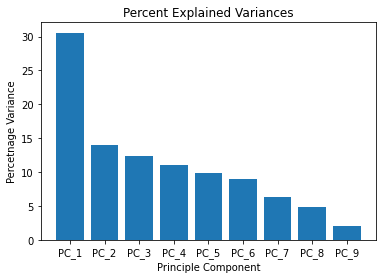

In [50]:
import matplotlib.pyplot as plt

plt.bar(range(len(pca_values)), height=pca_values, tick_label=labels)
plt.title('Percent Explained Variances')
plt.xlabel('Principle Component')
plt.ylabel('Percetnage Variance')
plt.show()